# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torch.utils.data import SubsetRandomSampler #split the dataset

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math

from sklearn.model_selection import KFold

# to reproducible results
torch.manual_seed(0)
np.random.seed(0)

import random
random.seed(0)

In [ ]:
# allow access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("dados_indoor_puc.csv")
df.head()

,Frequency,Distance,a_m,b_m,Walls,PL
0,26.5,6.59,6.3,1.94,2,112.1982
1,26.5,11.76,11.6,1.93,2,115.7627
2,26.5,9.04,8.9,1.60,3,122.5733
3,26.5,4.25,3.6,2.25,1,104.3808
4,26.5,3.50,2.7,2.22,1,100.7860


In [ ]:
df_ABG = pd.read_csv("ABG.csv")
df_CIF = pd.read_csv("CIF.csv")
df_ABGw = pd.read_csv("ABGw.csv")
df_CIFw = pd.read_csv("CIFw.csv")

# Creating input and output data

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# splitting the data 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
"""
Normalizing the data between 0 to 1
"""
# normalize inputs
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# normalize output
y_train = y_train.reshape(-1, 1)
y_train = scaler.fit_transform(y_train)
y_test = y_test.reshape(-1, 1)
y_test = scaler.transform(y_test)

# convert Output Variable to Float
y_train, y_test = y_train.astype(float), y_test.astype(float),

# Training phase

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# MLP (ANN)
mlp_regressor = MLPRegressor(hidden_layer_sizes=198,
                            activation='relu',
                            solver='lbfgs',
                            alpha=0.003,
                            learning_rate_init=0.001,
                            momentum=0.9,
                            random_state=1, 
                            max_iter=6000,
                            early_stopping=True)

mlp_regressor.fit(X_train,np.ravel(y_train))

# SVR
svr_regressor = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=399, epsilon=0.001, 
                shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr_regressor.fit(X_train,np.ravel(y_train))

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=146)
rf_regressor.fit(X_train, np.ravel(y_train))

# Gradient Boosting
Gradregressor = GradientBoostingRegressor(n_estimators=270, learning_rate=0.1, max_depth=3, random_state=0, loss='ls')
Gradregressor.fit(X_train,np.ravel(y_train))


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=270,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Testing phase

In [ ]:
# MLP Testing phase (prediction of the model)
y_pred_mlp = mlp_regressor.predict(X_test)
y_pred_mlp = y_pred_mlp.reshape(-1,1)
y_pred_desn_mlp = scaler.inverse_transform(y_pred_mlp) #desnormalization
y_target_desn_mlp = scaler.inverse_transform(y_test) #desnormalization

# SVR Testing phase (prediction of the model)
y_pred_svr = svr_regressor.predict(X_test)
y_pred_svr = y_pred_svr.reshape(-1,1)
y_pred_desn_svr = scaler.inverse_transform(y_pred_svr)
y_target_desn_svr = scaler.inverse_transform(y_test)

# RF Testing phase (prediction of the model)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf = y_pred_rf.reshape(-1,1)
y_pred_desn_rf = scaler.inverse_transform(y_pred_rf)
y_target_desn_rf = scaler.inverse_transform(y_test)

# GB Testing phase (prediction of the model)
y_pred_gb = Gradregressor.predict(X_test)
y_pred_gb = y_pred_gb.reshape(-1,1)
y_pred_desn_gb = scaler.inverse_transform(y_pred_gb)
y_target_desn_gb = scaler.inverse_transform(y_test)

# Statistical performance indicators

RMSE results

In [ ]:
# MLP
MSE = np.square(np.subtract(y_target_desn_mlp,y_pred_desn_mlp)).mean()
RMSE_desn_mlp = math.sqrt(MSE) # RMSE in dB with desnormalized value 

# SVR
MSE = np.square(np.subtract(y_target_desn_svr,y_pred_desn_svr)).mean()
RMSE_desn_svr = math.sqrt(MSE) # RMSE in dB with desnormalized value 

# RF 
MSE = np.square(np.subtract(y_target_desn_rf,y_pred_desn_rf)).mean()
RMSE_desn_rf = math.sqrt(MSE) # RMSE in dB with desnormalized value 

# GB
MSE = np.square(np.subtract(y_target_desn_gb,y_pred_desn_gb)).mean()
RMSE_desn_gb = math.sqrt(MSE)

R-square results

In [ ]:
from sklearn.metrics import r2_score
R2_score_mlp = r2_score(y_target_desn_mlp, y_pred_desn_mlp) # MLP
R2_score_svr = r2_score(y_target_desn_svr, y_pred_desn_svr) # SVR
R2_score_rf = r2_score(y_target_desn_rf, y_pred_desn_rf) #RF
R2_score_gb = r2_score(y_target_desn_gb, y_pred_desn_gb) #GB

Standar desviation results

In [ ]:
n = len(y_pred_desn_mlp)
sum_mlp=0 
sum_svr=0
sum_rf=0 
sum_gb=0

abs_dif_mlp = np.abs(y_target_desn_mlp-y_pred_desn_mlp)
mean_mlp = np.mean(abs_dif_mlp)

abs_dif_svr = np.abs(y_target_desn_svr-y_pred_desn_svr)
mean_svr = np.mean(abs_dif_svr)

abs_dif_rf = np.abs(y_target_desn_rf-y_pred_desn_rf)
mean_rf = np.mean(abs_dif_rf)

abs_dif_gb = np.abs(y_target_desn_gb-y_pred_desn_gb)
mean_gb = np.mean(abs_dif_gb)

for x in abs_dif_mlp:
    t = (x - mean_mlp) ** 2
    sum_mlp += t 

for x in abs_dif_svr:
    t = (x - mean_svr) ** 2
    sum_svr += t 

for x in abs_dif_rf:
    t = (x - mean_rf) ** 2
    sum_rf += t    

for x in abs_dif_gb:
    t = (x - mean_gb) ** 2
    sum_gb += t 

sd_mlp = math.sqrt(sum_mlp/(n))
sd_svr = math.sqrt(sum_svr/(n))
sd_rf = math.sqrt(sum_rf/(n))
sd_gb = math.sqrt(sum_gb/(n))

Summary results on the testing set

In [ ]:
import tabulate
from tabulate import tabulate

data = [['MLP',RMSE_desn_mlp, R2_score_mlp,sd_mlp],
['SVR',RMSE_desn_svr ,R2_score_svr,sd_svr],
['RF',RMSE_desn_rf ,R2_score_rf,sd_rf],
['GB',RMSE_desn_gb ,R2_score_gb,sd_gb]]

print(tabulate(data, headers=["Testing set","RMSE [dB]", 'R^2','SD']))

Testing set      RMSE [dB]       R^2       SD
-------------  -----------  --------  -------
MLP                4.82158  0.890136  2.9578
SVR                5.29905  0.8673    3.34936
RF                 4.47599  0.905321  2.96687
GB                 3.80326  0.931642  2.32104


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


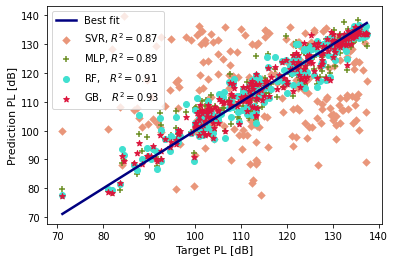

In [ ]:
"""
Plot results
"""
plt.scatter(df_ABG['PL_target'], y_pred_desn_svr, label= 'SVR, $R^2 = 0.87$',c='darksalmon',marker='D',linewidths=0)
plt.scatter(y_target_desn_mlp, y_pred_desn_mlp, label= 'MLP, $R^2 = 0.89$',c='olivedrab',marker='+')
plt.scatter(y_target_desn_rf, y_pred_desn_rf, label= 'RF,   $R^2 = 0.91$',c='turquoise')
plt.scatter(y_target_desn_gb, y_pred_desn_gb, label= 'GB,   $R^2 = 0.93$',c='crimson',marker='*')
p1 = max(max(y_target_desn_mlp), max(y_target_desn_mlp))
p2 = min(min(y_target_desn_mlp), min(y_target_desn_mlp))
plt.plot([p1, p2], [p1, p2], 'b-',linewidth=2.5,label= 'Best fit',c='navy')
plt.xlabel('Target PL [dB]', fontsize=11)
plt.ylabel('Prediction PL [dB]', fontsize=11)
plt.legend(loc='best')
plt.savefig('R2Comparison.eps',format='eps',dpi=1200)
plt.show()
plt.close()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


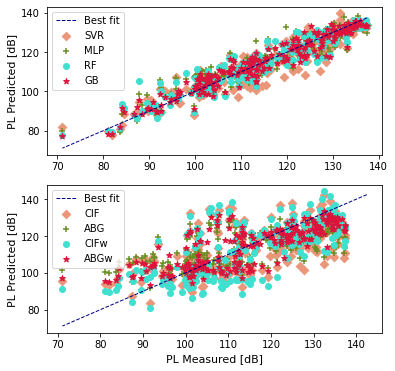

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(6,6))
fig.suptitle('')
ax1.scatter(y_target_desn_svr, y_pred_desn_svr, label= "SVR",c='darksalmon',marker='D')
#plt.rc('legend', loc="upper right")
ax1.scatter(y_target_desn_mlp, y_pred_desn_mlp, label= 'MLP',c='olivedrab',marker='+')
#ax1.legend(["MLP"])
ax1.scatter(y_target_desn_rf, y_pred_desn_rf, label= 'RF',c='turquoise')
#ax1.legend(["RF"])
ax1.scatter(y_target_desn_gb, y_pred_desn_gb, label= 'GB',c='crimson',marker='*')
ax1.set_ylabel('PL Predicted [dB]',fontsize=11)

p1 = max(max(y_target_desn_mlp), max(y_target_desn_mlp))
p2 = min(min(y_target_desn_mlp), min(y_target_desn_mlp))
ax1.plot([p1, p2], [p1, p2], '-',linewidth=1,linestyle='--',label= 'Best fit',c='navy')

ax2.scatter(df_CIF['PL_target'], df_CIF['PL_pred'], label= 'CIF',c='darksalmon',marker='D')
ax2.scatter(df_ABG['PL_target'], df_ABG['PL_pred'], label= 'ABG',c='olivedrab',marker='+')
ax2.scatter(df_CIFw['PL_target'], df_CIFw['PL_pred'], label= 'CIFw',c='turquoise')
ax2.scatter(df_ABGw['PL_target'], df_ABGw['PL_pred'], label= 'ABGw',c='crimson',marker='*')
ax2.set_ylabel('PL Predicted [dB]',fontsize=11)
ax2.set_xlabel('PL Measured [dB]',fontsize=11)
p1 = max(max(df_CIF['PL_target']), max(df_CIF['PL_pred']))
p2 = min(min(df_CIF['PL_target']), min(df_CIF['PL_pred']))
ax2.plot([p1, p2], [p1, p2], '-',linewidth=1,linestyle='--',label= 'Best fit',c='navy')

#for i, v in enumerate(df['R2']):
#    ax2.text(v, i , str(v), color='black',va="center",size=8)
    
#autolabel(group1)

#for ax in fig.get_axes():
 #   ax.label_outer()
ax1.legend(loc='upper left', frameon=True)
ax2.legend(loc='upper left', frameon=True)

plt.savefig('R2Comparison.eps',format='eps',dpi=1200)
plt.show()
plt.close()

In [ ]:
# Showing RMSE predicition for the Training set

# MLP
y_pred_mlp = mlp_regressor.predict(X_train)
y_pred_mlp = y_pred_mlp.reshape(-1,1)
y_pred_desn_mlp = scaler.inverse_transform(y_pred_mlp) #desnormalization
y_target_desn_mlp = scaler.inverse_transform(y_train) #desnormalization

# SVR 
y_pred_svr = svr_regressor.predict(X_train)
y_pred_svr = y_pred_svr.reshape(-1,1)
y_pred_desn_svr = scaler.inverse_transform(y_pred_svr)
y_target_desn_svr = scaler.inverse_transform(y_train)

# RF 
y_pred_rf = rf_regressor.predict(X_train)
y_pred_rf = y_pred_rf.reshape(-1,1)
y_pred_desn_rf = scaler.inverse_transform(y_pred_rf)
y_target_desn_rf = scaler.inverse_transform(y_train)

# GB
y_pred_gb = Gradregressor.predict(X_train)
y_pred_gb = y_pred_gb.reshape(-1,1)
y_pred_desn_gb = scaler.inverse_transform(y_pred_gb)
y_target_desn_gb = scaler.inverse_transform(y_train)

#RMSE
MSE = np.square(np.subtract(y_target_desn_mlp,y_pred_desn_mlp)).mean()
RMSE_desn_mlp = math.sqrt(MSE) # RMSE in dB with desnormalized value 

MSE = np.square(np.subtract(y_target_desn_svr,y_pred_desn_svr)).mean()
RMSE_desn_svr = math.sqrt(MSE) # RMSE in dB with desnormalized value 

MSE = np.square(np.subtract(y_target_desn_rf,y_pred_desn_rf)).mean()
RMSE_desn_rf = math.sqrt(MSE) # RMSE in dB with desnormalized value 

MSE = np.square(np.subtract(y_target_desn_gb,y_pred_desn_gb)).mean()
RMSE_desn_gb = math.sqrt(MSE) # RMSE in dB with desnormalized value 

#R^2
R2_score_mlp = r2_score(y_target_desn_mlp, y_pred_desn_mlp) # MLP
R2_score_svr = r2_score(y_target_desn_svr, y_pred_desn_svr) # SVR
R2_score_rf = r2_score(y_target_desn_rf, y_pred_desn_rf) #RF
R2_score_gb = r2_score(y_target_desn_gb, y_pred_desn_gb) #GB

# SD
n = len(y_pred_desn_mlp)
sum_mlp=0 
sum_svr=0
sum_rf=0 
sum_gb=0

abs_dif_mlp = np.abs(y_target_desn_mlp-y_pred_desn_mlp)
mean_mlp = np.mean(abs_dif_mlp)

abs_dif_svr = np.abs(y_target_desn_svr-y_pred_desn_svr)
mean_svr = np.mean(abs_dif_svr)

abs_dif_rf = np.abs(y_target_desn_rf-y_pred_desn_rf)
mean_rf = np.mean(abs_dif_rf)

abs_dif_gb = np.abs(y_target_desn_gb-y_pred_desn_gb)
mean_gb = np.mean(abs_dif_gb)

for x in abs_dif_mlp:
    t = (x - mean_mlp) ** 2
    sum_mlp += t 

for x in abs_dif_svr:
    t = (x - mean_svr) ** 2
    sum_svr += t 

for x in abs_dif_rf:
    t = (x - mean_rf) ** 2
    sum_rf += t    

for x in abs_dif_gb:
    t = (x - mean_gb) ** 2
    sum_gb += t 

sd_mlp = math.sqrt(sum_mlp/(n))
sd_svr = math.sqrt(sum_svr/(n))
sd_rf = math.sqrt(sum_rf/(n))
sd_gb = math.sqrt(sum_gb/(n))

data = [['MLP',RMSE_desn_mlp, R2_score_mlp,sd_mlp],
['SVR',RMSE_desn_svr ,R2_score_svr,sd_svr],
['RF',RMSE_desn_rf ,R2_score_rf,sd_rf],
['GB',RMSE_desn_gb ,R2_score_gb,sd_gb]]

print(tabulate(data, headers=["Training set","RMSE [dB]", 'R^2','SD']))

Training set      RMSE [dB]       R^2       SD
--------------  -----------  --------  -------
MLP                 4.23196  0.913449  2.70912
SVR                 5.26191  0.866193  3.85786
RF                  2.16926  0.977259  1.54847
GB                  3.42864  0.943189  2.27426
